In [1]:
#this code was heavily borrowed from: https://medium.com/luca-chuangs-bapm-notes/build-a-neural-network-in-python-binary-classification-49596d7dcabf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import math
import seaborn as sns

In [2]:
df1 = pd.read_csv('input.csv')
df1

,y-size,y-local
0,4,1.373240
1,4,-4.944870
2,4,-7.841000
3,3,0.978565
4,7,-7.251630
...,...,...
13459,5,-4.636650
13460,5,1.955300
13461,2,7.074700
13462,6,0.127066


In [3]:
df2 = pd.read_csv('labels.csv')
df2

,pt
0,0
1,1
2,1
3,0
4,0
...,...
13459,0
13460,0
13461,0
13462,0


In [4]:
X = df1.values
y = df2.values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(13464, 2) (13464, 1)
(10771, 2) (2693, 2) (10771, 1) (2693, 1)


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [7]:
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X,
                    y,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                48        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
1078/1078 [==============================] - 1s 941us/step - loss: 0.6597 - accuracy: 0.5978 - val_loss: 0.6359 - val_accuracy: 0.6914
Epoch 2/80
1078/1078 [==============================] - 1s 850us/step - loss: 0.6162 - accuracy: 0.6827 - val_loss: 0.6004 - val_accuracy: 0.7089
Epoch 3/80
1078/1078 [======

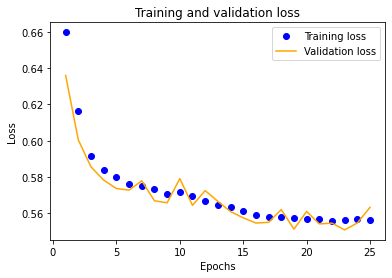

In [14]:
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) 

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss.png')

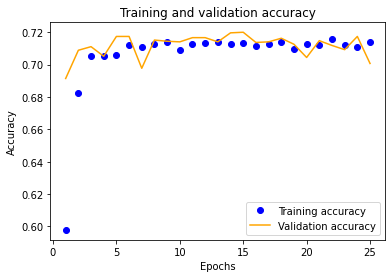

0.7200148701667786

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

np.max(val_acc)

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1? 
model.predict(X) # prob of successes (survival)
np.round(model.predict(X),0) # 1 and 0 (survival or not)
 # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X),0)

print(confusion_matrix(y, preds)) # order matters! (actual, predicted)

print(classification_report(y, preds))

[[4598 2134]
 [1715 5017]]
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      6732
           1       0.70      0.75      0.72      6732

    accuracy                           0.71     13464
   macro avg       0.71      0.71      0.71     13464
weighted avg       0.71      0.71      0.71     13464

